In [1495]:
from kan import *
import torch
import matplotlib.pyplot as plt
from torch import autograd
from tqdm import tqdm
from pyscf import gto, scf
from collections import Counter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

In [1496]:
# Total number of electrons
total_electrons = 1
total_electrons

NUM_ELECTRONS = total_electrons
INPUT_DIM = NUM_ELECTRONS
OUTPUT_DIM = NUM_ELECTRONS


# Create MultKAN model with specified widths
# Create the initial MultKAN model
#model = MultKAN(width=[1,[0,1],1], grid=5, k=3, seed=42, mult_arity=2)
model = KAN(width=[1,1], grid=5, k=3, seed=0)

# Create dataset
f = lambda x:  (1 / np.sqrt(32 * np.pi)) * (2 - x[:,[0]]) * torch.exp((-1/2) * x[:,[0]]) 
dataset = create_dataset(f, n_var=1, ranges=[0,20], train_num=10000)
print("Dataset shapes:", dataset['train_input'].shape, dataset['train_label'].shape)

checkpoint directory created: ./model
saving model version 0.0
Dataset shapes: torch.Size([10000, 1]) torch.Size([10000, 1])


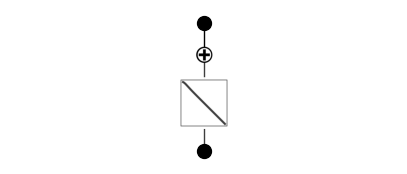

In [1497]:
model(dataset['train_input'])
model.plot(beta=1)

In [1498]:
model.fit(dataset, steps=100, lamb=0.001)

| train_loss: 2.21e-03 | test_loss: 2.05e-03 | reg: 1.57e-01 | : 100%|█| 100/100 [00:03<00:00, 26.83


saving model version 0.1


{'train_loss': [array(0.01708554),
  array(0.01377941),
  array(0.01175541),
  array(0.00274449),
  array(0.0026573),
  array(0.00246708),
  array(0.00250931),
  array(0.00250965),
  array(0.00250893),
  array(0.00251594),
  array(0.00243447),
  array(0.00256383),
  array(0.00263514),
  array(0.00242143),
  array(0.00222862),
  array(0.00222588),
  array(0.00223753),
  array(0.00222241),
  array(0.00221237),
  array(0.00219577),
  array(0.00221832),
  array(0.0022129),
  array(0.00221358),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
  array(0.00221356),
 

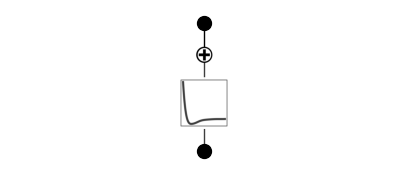

In [1499]:
model.plot(beta=1)

In [1500]:
grids = np.array([3,10,20,50])

train_losses = []
test_losses = []
steps = 100

for i in range(grids.shape[0]):
        model = model.refine(grids[i])
        results = model.fit(dataset, opt="LBFGS", steps=steps)
        train_losses += results['train_loss']
        test_losses += results['test_loss']

saving model version 0.2


| train_loss: 8.11e-04 | test_loss: 7.98e-04 | reg: 1.67e-01 | : 100%|█| 100/100 [00:01<00:00, 59.43


saving model version 0.3
saving model version 0.4


| train_loss: 9.37e-05 | test_loss: 9.05e-05 | reg: 1.67e-01 | : 100%|█| 100/100 [00:10<00:00,  9.17


saving model version 0.5
saving model version 0.6


| train_loss: 8.17e-06 | test_loss: 8.36e-06 | reg: 1.67e-01 | : 100%|█| 100/100 [00:05<00:00, 17.66


saving model version 0.7
saving model version 0.8


| train_loss: 3.88e-07 | test_loss: 3.75e-07 | reg: 1.67e-01 | : 100%|█| 100/100 [00:16<00:00,  6.09

saving model version 0.9


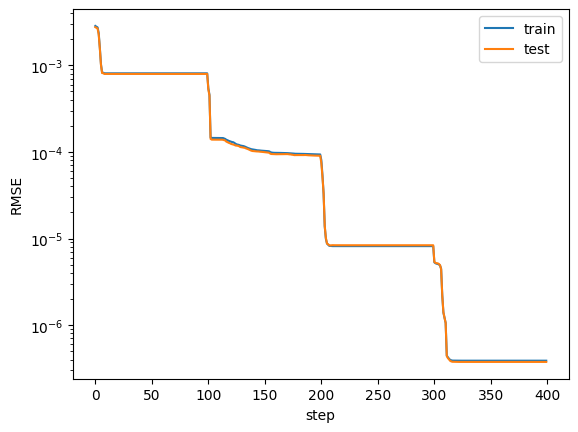

In [1501]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

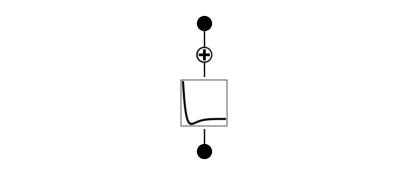

In [1502]:
model.plot()

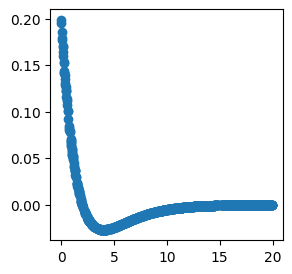

In [1503]:
function_1 = np.array(model.get_fun(0,0,0))

In [1504]:
total_fun1 = function_1[0]
total_fun2 = function_1[1]

In [1505]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,1,'x')
    model.fix_symbolic(0,0,1,'exp')
elif mode == "auto":
    # automatic mode
    lib = ['x','exp']
    model.auto_symbolic(lib=lib, weight_simple=0.7)

fixing (0,0,0) with exp, r2=0.8927891547679307, c=2
saving model version 0.10


In [1506]:
sf = model.symbolic_formula()[0][0]

In [1507]:
nsimplify(ex_round(ex_round(sf, 3),3))

-8/993 + 29*exp(-343*x_1/250)/125

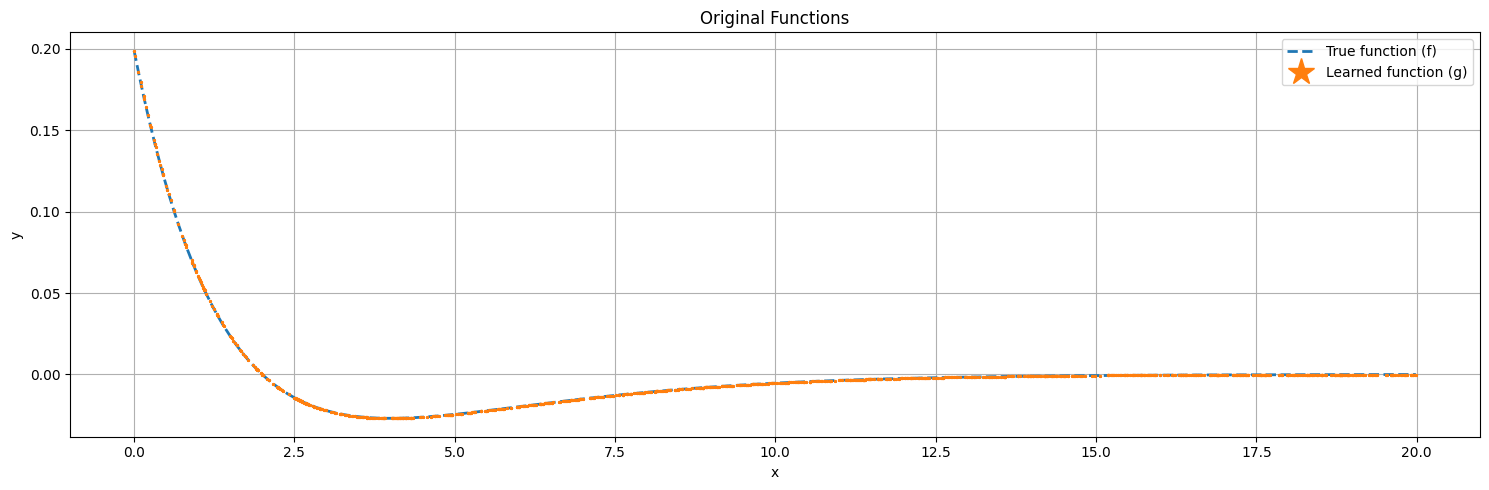

In [1508]:
x = total_fun1.reshape(-1, 1)

f =  ((1 / np.sqrt(32 * np.pi)) * (2 - x) * np.exp(-0.5 * x))
g = total_fun2.reshape(-1, 1)

# Create subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))

# Regular functions plot
ax1.plot(x, f, '--', label='True function (f)', linewidth=2)
ax1.plot(x, g, '*', label='Learned function (g)', linewidth=1, markersize=2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Original Functions')
ax1.legend(markerscale=10)
ax1.grid(True)


plt.tight_layout()
plt.show()

In [1509]:
mse = np.mean((f - g) ** 2)
print(f"Mean Squared Error: {mse:.10f}")

Mean Squared Error: 0.0000000000
